./data/depth1116/depth1_1.npy


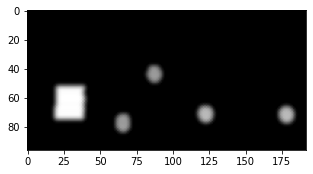

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import distance
# 2D에서 argmin
def np_argmin(A:np):
    return np.unravel_index(A.argmin(), A.shape)

# plot tool
def plot_hist(A, xlim_left=None, xlim_right=None, ylim_top=None, ylim_bottom=None):
    plt.figure(figsize=(5,5))
    plt.imshow(A[...,None], cmap='gray')
    plt.show()
    
    # plt.hist(A.flatten(), bins=100)
    # if xlim_left   != None: plt.xlim(left=xlim_left)
    # if xlim_right  != None: plt.xlim(right=xlim_right)
    # if ylim_top    != None: plt.ylim(top=ylim_top)
    # if ylim_bottom != None: plt.ylim(bottom=ylim_bottom)
    # plt.show()

image_path = "./data/depth1116/depth1_1.npy"
print(image_path)
rawImage = np.load(image_path).astype(np.float32)

def transform_scene_image(rawImage):
    temp = distance.cdist(rawImage.T, rawImage.T, 'euclidean')
    temp = np.sum(temp, axis=0)
    free_table_idx = np_argmin(temp)

    TABLE_DEPTH = np.tile(rawImage[:,free_table_idx], reps=(1,192))

    minval = np.min(TABLE_DEPTH)
    maxval = np.max(TABLE_DEPTH)
    GROUNDED_TABLE_DEPTH = TABLE_DEPTH - minval
    GroundedImage = rawImage - minval
    No_occulsion_image = np.where(GroundedImage<-0.5, GROUNDED_TABLE_DEPTH, GroundedImage)
    No_BackGround_image = No_occulsion_image - GROUNDED_TABLE_DEPTH
    fliped_image = -np.where(No_BackGround_image>0, np.zeros_like(No_BackGround_image), No_BackGround_image)
    temp = fliped_image

    for i in range(10):
        south_image = np.roll(temp, 1, axis = 0)
        north_image = np.roll(temp, -1, axis = 0)
        east_image  = np.roll(temp, 1, axis = 1)
        west_image  = np.roll(temp, -1, axis = 1)

        if i % 2 ==0:
            temp = np.where((south_image+north_image+east_image+west_image)/4 < 0.01, np.zeros_like(temp), temp)
        if i % 2 ==1:
            temp = (south_image+north_image+east_image+west_image)/4

    clean_image = temp / (maxval-minval)
    return clean_image

clean_image = transform_scene_image(rawImage)
plot_hist(clean_image, xlim_left=0.01, ylim_top = 200)

In [5]:
epoch_num = 1000
agent_num = 200
for epoch in range(999,epoch_num):
    for agent in range(agent_num):
        print("Epoch: {} Agent: {}".format(epoch+1,agent+1))
        image_path = "./data/depth1116/depth{}_{}.npy".format(epoch+1, agent+1)
        rawImage = np.load(image_path).astype(np.float32)
        clean_image = transform_scene_image(rawImage)
        np.save("data/depth1116_new/depth{}_{}.npy".format(epoch+1,agent+1), clean_image)



Epoch: 1000 Agent: 1
Epoch: 1000 Agent: 2
Epoch: 1000 Agent: 3
Epoch: 1000 Agent: 4
Epoch: 1000 Agent: 5
Epoch: 1000 Agent: 6
Epoch: 1000 Agent: 7
Epoch: 1000 Agent: 8
Epoch: 1000 Agent: 9
Epoch: 1000 Agent: 10
Epoch: 1000 Agent: 11
Epoch: 1000 Agent: 12
Epoch: 1000 Agent: 13
Epoch: 1000 Agent: 14
Epoch: 1000 Agent: 15
Epoch: 1000 Agent: 16
Epoch: 1000 Agent: 17
Epoch: 1000 Agent: 18
Epoch: 1000 Agent: 19
Epoch: 1000 Agent: 20
Epoch: 1000 Agent: 21
Epoch: 1000 Agent: 22
Epoch: 1000 Agent: 23
Epoch: 1000 Agent: 24
Epoch: 1000 Agent: 25
Epoch: 1000 Agent: 26
Epoch: 1000 Agent: 27
Epoch: 1000 Agent: 28
Epoch: 1000 Agent: 29
Epoch: 1000 Agent: 30
Epoch: 1000 Agent: 31
Epoch: 1000 Agent: 32
Epoch: 1000 Agent: 33
Epoch: 1000 Agent: 34
Epoch: 1000 Agent: 35
Epoch: 1000 Agent: 36
Epoch: 1000 Agent: 37
Epoch: 1000 Agent: 38
Epoch: 1000 Agent: 39
Epoch: 1000 Agent: 40
Epoch: 1000 Agent: 41
Epoch: 1000 Agent: 42
Epoch: 1000 Agent: 43
Epoch: 1000 Agent: 44
Epoch: 1000 Agent: 45
Epoch: 1000 Agent: 

./data/depth1116_new/depth1_20.npy
(96, 192)


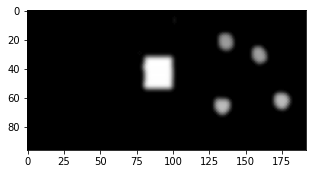

: 

In [14]:
image_path = "./data/depth1116_new/depth1_20.npy"
print(image_path)
rawImage = np.load(image_path).astype(np.float32)
print(rawImage.shape)
plot_hist(rawImage)

In [2]:
mean = np.load("x_mean1d_1116_new.npy")
print(mean)
print(mean.shape)

[0.7201303  0.6269356  0.58353096 0.60496056 0.6874577  0.61023647
 0.33432063 0.6433237  0.5827343  0.6932173 ]
(10,)


In [3]:
std = np.load("x_std1d_1116_new.npy")
print(std)
print(std.shape)

[0.26619032 0.2693178  0.28872332 0.25154737 0.30318132 0.30696806
 0.11072476 0.1763327  0.25546178 0.270142  ]
(10,)
